In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [76]:
# Load Titanic dataset
df = pd.read_csv('/content/sample_data/titanic.csv')




In [77]:
# Display dataset
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
# Display first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
# Display last few rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [80]:

# Check missing values
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [81]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
# Check if the columns exist before dropping
drop_cols = ['deck', 'embark_town', 'alive', 'who', 'class', 'adult_male']
df = df.drop(columns=[col for col in drop_cols if col in df.columns], axis=1)

In [89]:
# Fill missing values safely
if 'age' in df.columns:
    df['age'].fillna(df['age'].median(), inplace=True)

if 'embarked' in df.columns and not df['embarked'].mode().empty:
    df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

if 'fare' in df.columns:
    df['fare'].fillna(df['fare'].median(), inplace=True)

In [91]:
# Drop remaining rows with missing values
df.dropna(inplace=True)


In [92]:
# Verify missing values
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [93]:


# Initialize LabelEncoder
label_enc = LabelEncoder()

# Encode categorical columns only if they exist
for col in ['sex', 'embarked', 'alone']:
    if col in df.columns:
        df[col] = label_enc.fit_transform(df[col])

# Display dataset after encoding
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
df = pd.read_csv("/content/sample_data/titanic.csv")



In [95]:
# Print column names
print("Dataset Columns:", df.columns)


Dataset Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [97]:
# Define features and target
X = df.drop(columns=['Survived'])
y = df['Survived']

In [98]:
# Drop non-numeric columns
X = X.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], errors='ignore')


In [99]:
# Convert categorical columns to numeric using Label Encoding
label_enc = LabelEncoder()
for col in ['Sex', 'Embarked']:  # Encode categorical columns
    if col in X.columns:
        X[col] = label_enc.fit_transform(X[col])

In [100]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [101]:
# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
# Display results
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 7)
X_test shape: (179, 7)
y_train shape: (712,)
y_test shape: (179,)


In [103]:
# Define features and target
X = df.drop(columns=['Survived'])
y = df['Survived']




In [104]:
# Drop non-numeric columns
X = X.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], errors='ignore')



In [105]:
# Encode categorical columns
label_enc = LabelEncoder()
for col in ['Sex', 'Embarked']:
    if col in X.columns:
        X[col] = label_enc.fit_transform(X[col])



In [106]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [107]:
# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [108]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [109]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [110]:

# Evaluate model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


In [111]:

# Display results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9803
Test Accuracy: 0.8268


In [112]:
 #Make predictions
y_pred = model.predict(X_test)




In [113]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.83


In [114]:

# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



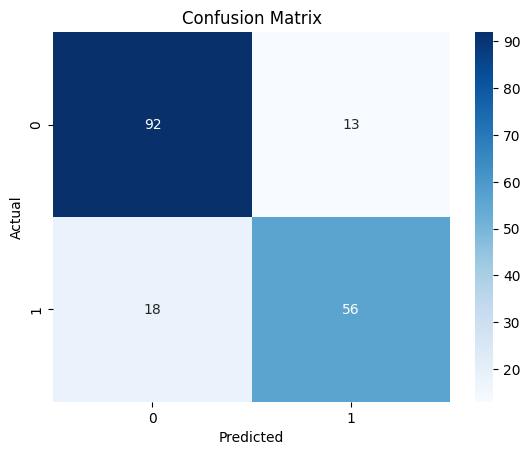

In [115]:

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

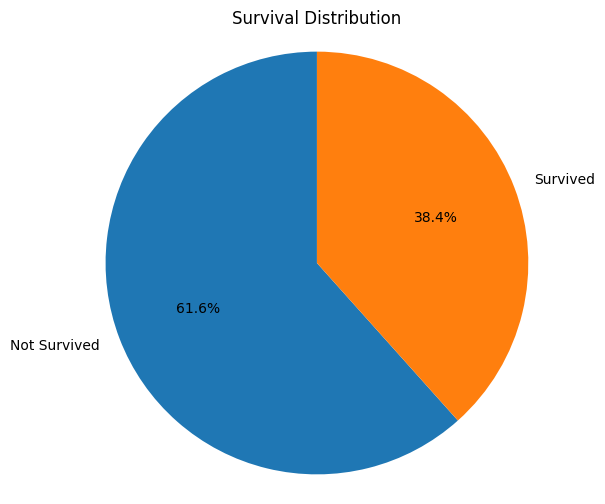

In [126]:

import matplotlib.pyplot as plt

survived_counts = df['Survived'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution')
plt.axis('equal')
plt.show()


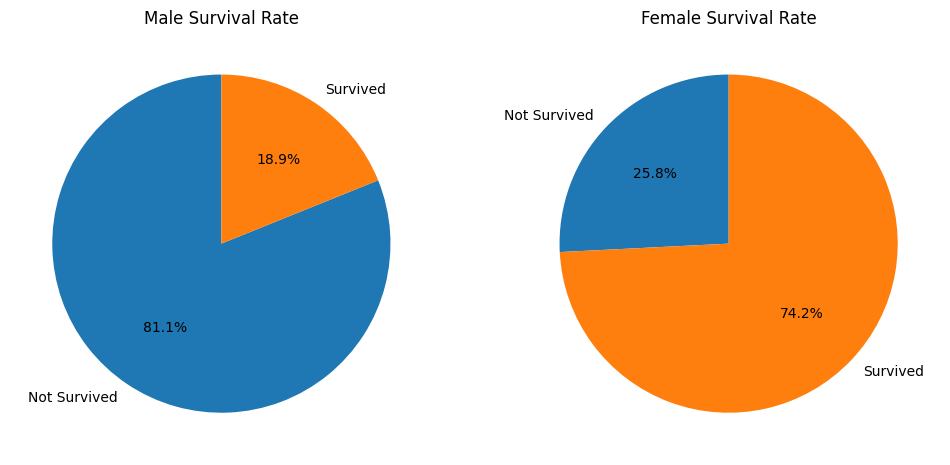

In [127]:

import matplotlib.pyplot as plt
# Create a new dataframe with survived and sex
survived_sex = df[['Survived', 'Sex']]

# Count survived male and female
survived_counts = survived_sex.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Plot the pie chart
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(survived_counts.loc['male'], labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Male Survival Rate')

plt.subplot(1, 2, 2)
plt.pie(survived_counts.loc['female'], labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Female Survival Rate')

plt.show()

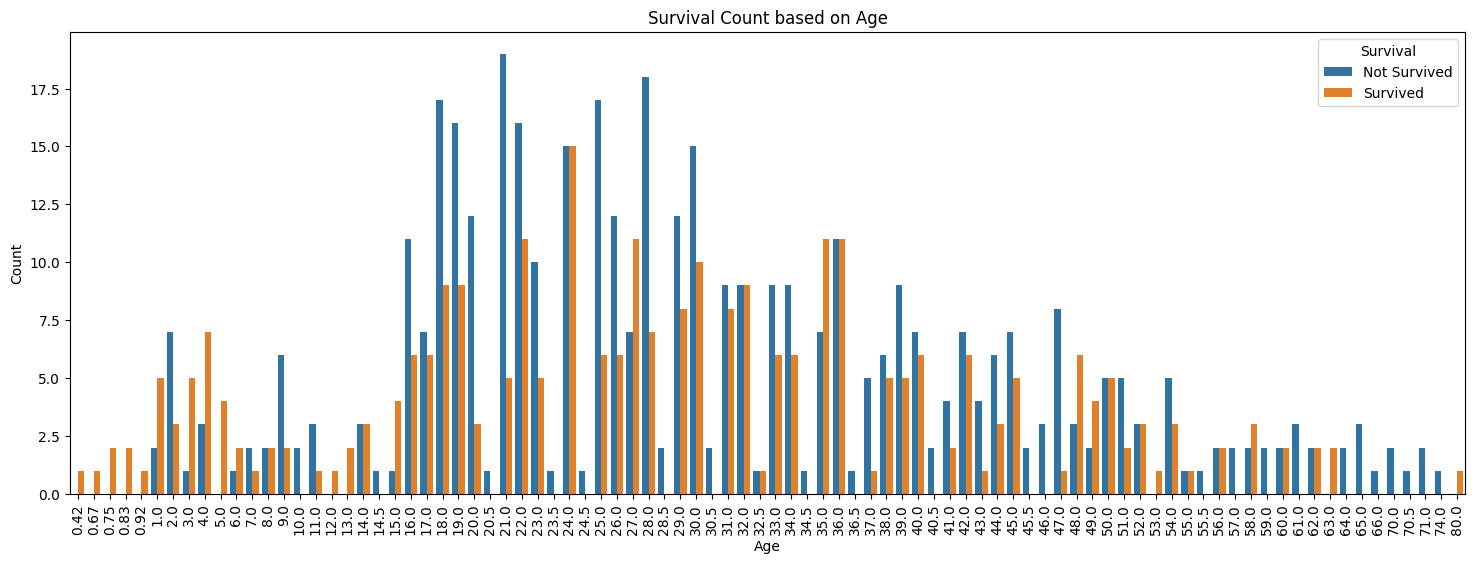

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
ax = sns.countplot(x='Age', hue='Survived', data=df)
# Joint bar graph of survived based on age
plt.title('Survival Count based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
handles, labels = ax.get_legend_handles_labels()
labels = ['Not Survived', 'Survived']
ax.legend(handles, labels, title='Survival')
plt.show()

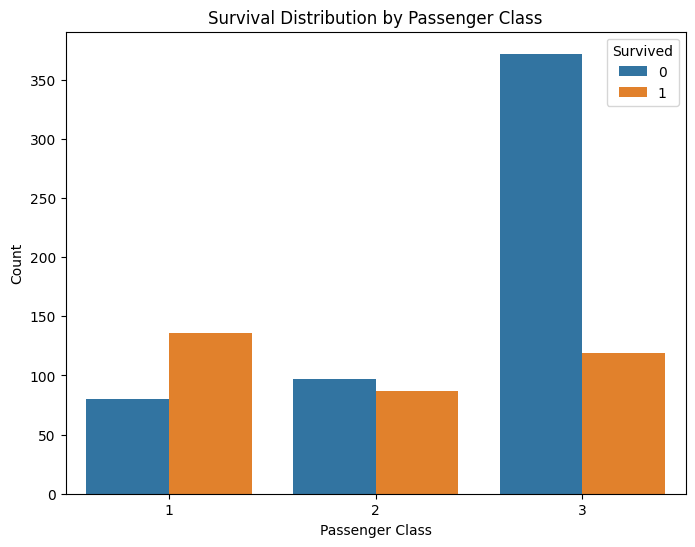

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()